# Minimum Covarance Determinant
The standard covariance maximum likelihood estimate (MLE) is very sensitive to the presence of outliers in the data set and therefore, the downstream Mahalanobis distances also are. It would be better to use a robust estimator of covariance to guarantee that the estimation is resistant to “erroneous” observations in the dataset and that the calculated Mahalanobis distances accurately reflect the true organization of the observations.

The Minimum Covariance Determinant estimator (MCD) is a robust, high-breakdown point (i.e. it can be used to estimate the covariance matrix of highly contaminated datasets, up to $\frac{n_{samples} - n_{features} - 1}{2}$ outliers) estimator of covariance. The idea behind the MCD is to find
observations whose empirical covariance has the smallest determinant, yielding a “pure” subset of observations from which to compute standards estimates of location and covariance.

Reference [sklearn](https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html#sphx-glr-auto-examples-covariance-plot-mahalanobis-distances-py)

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.covariance import EmpiricalCovariance, MinCovDet

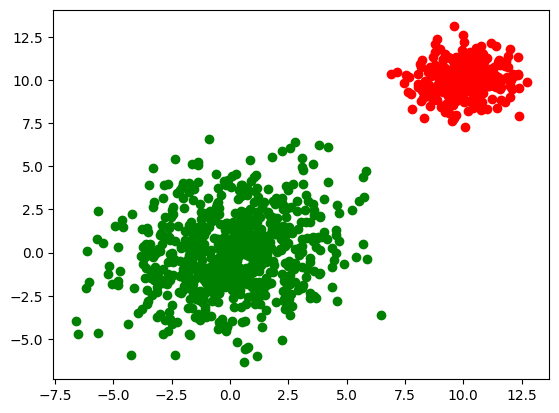

In [122]:
N = 1000
OUTLIERS_PERC = 0.3
INLIERS_MEAN = np.array([0, 0])
INLIERS_COV = np.array([[5, 1], [1, 5]])
INLIERS_COUNT = int(N * (1-OUTLIERS_PERC))
OUTLIERS_MEAN = np.array([10, 10])
OUTLIERS_COV = np.array([[1, 0.1], [0.1, 1]])
OUTLIERS_COUNT = N - INLIERS_COUNT
MAX_MAHALANOBIS_DISTANCE = 3

data = np.zeros(shape=(N, 2))
data[0:INLIERS_COUNT] = np.random.multivariate_normal(mean=INLIERS_MEAN, cov=INLIERS_COV, size=INLIERS_COUNT)
data[INLIERS_COUNT:] = np.random.multivariate_normal(mean=OUTLIERS_MEAN, cov=OUTLIERS_COV, size=OUTLIERS_COUNT)

plt.scatter(data[0:INLIERS_COUNT, 0], data[0:INLIERS_COUNT, 1], c='green')
plt.scatter(data[INLIERS_COUNT:, 0], data[INLIERS_COUNT:, 1], c='red')
plt.show()


[[24.65752644 21.50818279]
 [21.50818279 24.74624327]]


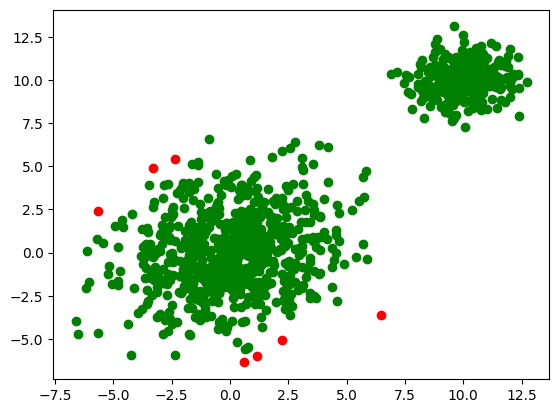

In [123]:
emp_cov = EmpiricalCovariance().fit(data)
print(emp_cov.covariance_)
mean = emp_cov.location_
S_inv = np.linalg.inv(emp_cov.covariance_)
distance = np.sqrt(np.diag((data - mean) @ S_inv @ (data - mean).T))

for i in range(0, N):
    if distance[i] < MAX_MAHALANOBIS_DISTANCE:
        plt.scatter(data[i, 0], data[i, 1], c='green')
    else:
        plt.scatter(data[i, 0], data[i, 1], c='red')

[[5.03471717 0.95220198]
 [0.95220198 5.21957584]]


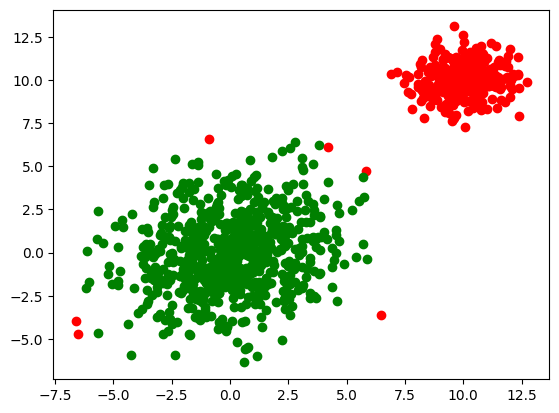

In [124]:
robust_cov = MinCovDet().fit(data)
print(robust_cov.covariance_)
mean = robust_cov.location_
S_inv = np.linalg.inv(robust_cov.covariance_)
distance = np.sqrt(np.diag((data - mean) @ S_inv @ (data - mean).T))

for i in range(0, N):
    if distance[i] < MAX_MAHALANOBIS_DISTANCE:
        plt.scatter(data[i, 0], data[i, 1], c='green')
    else:
        plt.scatter(data[i, 0], data[i, 1], c='red')

[[2.51730494 0.65111794]
 [0.65111794 2.5830038 ]]


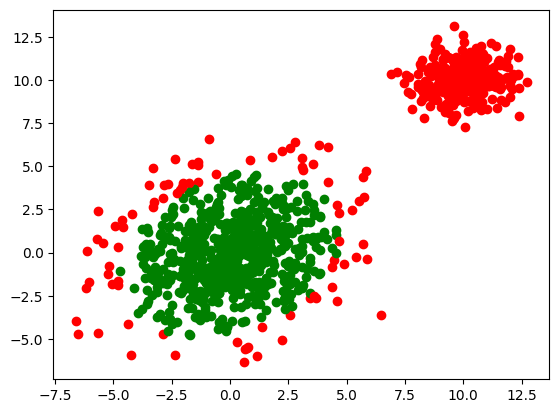

In [139]:
# Quick implementation
def mcd(data, contamination=0.5, max_iter=500):
    n = data.shape[0]
    k = int(np.ceil((1 - contamination) * n))
    
    mean = np.mean(data, axis=0)
    S = np.cov(data.T)
    S_inv = np.linalg.inv(S)
    for _ in range(0, max_iter):
        distance = np.diag((data - mean) @ S_inv @ (data - mean).T)
        partial_sort_indeces = np.argpartition(distance, k)
        inliers = np.zeros(n)
        inliers[partial_sort_indeces[0:k]] = 1
        
        mean = np.mean(data[inliers == 1], axis=0)
        S = np.cov(data[inliers == 1].T)
        S_inv = np.linalg.inv(S)   
    
    return mean, S

mean, S = mcd(data)
print(S)
S_inv = np.linalg.inv(S)
distance = np.sqrt(np.diag((data - mean) @ S_inv @ (data - mean).T))

for i in range(0, N):
    if distance[i] < MAX_MAHALANOBIS_DISTANCE:
        plt.scatter(data[i, 0], data[i, 1], c='green')
    else:
        plt.scatter(data[i, 0], data[i, 1], c='red')